In [7]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import sys
from pathlib import Path


In [8]:
# Set up paths dynamically
current_dir = Path.cwd()
project_root = current_dir.parent if current_dir.name == 'code' else current_dir
code_dir = project_root / 'code'
data_dir = project_root / 'data'
figures_dir = project_root / 'figures'

# Create directories if they don't exist
data_dir.mkdir(exist_ok=True)
figures_dir.mkdir(exist_ok=True)

# Add code directory to Python path
sys.path.append(str(code_dir))

print(f"Project root: {project_root}")
print(f"Code directory: {code_dir}")
print(f"Data directory: {data_dir}")
print(f"Figures directory: {figures_dir}")


Project root: /Users/harashimakoshi/CS332/332Project2
Code directory: /Users/harashimakoshi/CS332/332Project2/code
Data directory: /Users/harashimakoshi/CS332/332Project2/data
Figures directory: /Users/harashimakoshi/CS332/332Project2/figures


In [9]:
# Import custom modules
from A_afp import AdversarialFairPayoffs
from B_bp import BernoulliPayoffs
from C_pp import EspacePayoffs
from D_rp import ResearchPayoffs
from EW import ExponentialWeights
from MC import MonteCarloSimulation

In [10]:
# Fixed parameters
k = 3  # For AdversarialFairPayoffs and BernoulliPayoffs
k_research = 2  # For ResearchPayoffs (AI vs Human)
n = 1000  
num_simulations = 2000  # Monte Carlo simulation times

# Epsilon values
epsilon_values = {
    'random': 0.01,  
    'optimal': np.sqrt(np.log(k) / n), 
    'FTL': 100  
}

print(f"Epsilon values (k={k}):")
for name, value in epsilon_values.items():
    print(f"  {name}: {value:.6f}")


Epsilon values (k=3):
  random: 0.010000
  optimal: 0.033145
  FTL: 100.000000


# A, B

In [13]:
# AdversarialFairPayoffs environment

# Save results
results_data = []

for epsilon_name, epsilon_value in epsilon_values.items():
    print(f"\nRunning simulations for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    regret_histories = []
    total_payoffs = []
    
    for sim in range(num_simulations):
        env = AdversarialFairPayoffs(k)
        algorithm = ExponentialWeights(k, epsilon=epsilon_value, n=n)
        
        # Run algorithm
        regret_history, total_payoff, action_history, cumulative_payoffs = algorithm.run_algorithm(env.generate_payoffs)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        
        if (sim + 1) % 20 == 0:
            print(f"  Completed {sim + 1}/{num_simulations} simulations")
    
    # Add results to dataframe
    regret_array = np.array(regret_histories)
    mean_regret = np.mean(regret_array, axis=0)
    std_regret = np.std(regret_array, axis=0)
    final_regrets = regret_array[:, -1]
    
    for round_num in range(n):
        results_data.append({
            'round': round_num + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'mean_regret': mean_regret[round_num],
            'std_regret': std_regret[round_num],
            'final_regret_mean': np.mean(final_regrets),
            'final_regret_std': np.std(final_regrets)
        })

print("\nAll simulations completed!")

results_df = pd.DataFrame(results_data)

# Save results to csv file
adversarial_csv_path = data_dir / 'adversarial_fair_payoffs_results.csv'
results_df.to_csv(adversarial_csv_path, index=False)
print(f"Results saved to {adversarial_csv_path}")

# Statistical results
print("\nFinal regret statistics:")
for epsilon_name in epsilon_values.keys():
    subset = results_df[results_df['epsilon_type'] == epsilon_name]
    final_stats = subset.iloc[0]  
    print(f"  {epsilon_name}: Mean = {final_stats['final_regret_mean']:.4f}, Std = {final_stats['final_regret_std']:.4f}")



Running simulations for random (epsilon = 0.010000)...
  Completed 20/2000 simulations
  Completed 40/2000 simulations
  Completed 60/2000 simulations
  Completed 80/2000 simulations
  Completed 100/2000 simulations
  Completed 120/2000 simulations
  Completed 140/2000 simulations
  Completed 160/2000 simulations
  Completed 180/2000 simulations
  Completed 200/2000 simulations
  Completed 220/2000 simulations
  Completed 240/2000 simulations
  Completed 260/2000 simulations
  Completed 280/2000 simulations
  Completed 300/2000 simulations
  Completed 320/2000 simulations
  Completed 340/2000 simulations
  Completed 360/2000 simulations
  Completed 380/2000 simulations
  Completed 400/2000 simulations
  Completed 420/2000 simulations
  Completed 440/2000 simulations
  Completed 460/2000 simulations
  Completed 480/2000 simulations
  Completed 500/2000 simulations
  Completed 520/2000 simulations
  Completed 540/2000 simulations
  Completed 560/2000 simulations
  Completed 580/2000 sim

In [14]:
# BernoulliPayoffs environment

# Save results
results_data_bernoulli = []

for epsilon_name, epsilon_value in epsilon_values.items():
    print(f"\nRunning simulations for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    regret_histories = []
    total_payoffs = []
    
    for sim in range(num_simulations):
        env = BernoulliPayoffs(k)
        algorithm = ExponentialWeights(k, epsilon=epsilon_value, n=n)
        
        # Run algorithm
        regret_history, total_payoff, action_history, cumulative_payoffs = algorithm.run_algorithm(env.generate_payoffs)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        
        if (sim + 1) % 20 == 0:
            print(f"  Completed {sim + 1}/{num_simulations} simulations")
    
    # Add results to dataframe
    regret_array = np.array(regret_histories)
    mean_regret = np.mean(regret_array, axis=0)
    std_regret = np.std(regret_array, axis=0)
    final_regrets = regret_array[:, -1]
    
    for round_num in range(n):
        results_data_bernoulli.append({
            'round': round_num + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'mean_regret': mean_regret[round_num],
            'std_regret': std_regret[round_num],
            'final_regret_mean': np.mean(final_regrets),
            'final_regret_std': np.std(final_regrets)
        })

print("\nAll simulations completed!")

results_df_bernoulli = pd.DataFrame(results_data_bernoulli)

# Save results to csv file
bernoulli_csv_path = data_dir / 'bernoulli_payoffs_results.csv'
results_df_bernoulli.to_csv(bernoulli_csv_path, index=False)
print(f"Results saved to {bernoulli_csv_path}")

# Statistical results
print("\nFinal regret statistics:")
for epsilon_name in epsilon_values.keys():
    subset = results_df_bernoulli[results_df_bernoulli['epsilon_type'] == epsilon_name]
    final_stats = subset.iloc[0]  
    print(f"  {epsilon_name}: Mean = {final_stats['final_regret_mean']:.4f}, Std = {final_stats['final_regret_std']:.4f}")



Running simulations for random (epsilon = 0.010000)...
Bernoulli probabilities for each action: [0.11178918 0.17788826 0.02414474]
Bernoulli probabilities for each action: [0.17574682 0.01047606 0.38930247]
Bernoulli probabilities for each action: [0.26238145 0.23817494 0.25113958]
Bernoulli probabilities for each action: [0.41937188 0.03129156 0.07837334]
Bernoulli probabilities for each action: [0.01607455 0.48070934 0.00093684]
Bernoulli probabilities for each action: [0.41651999 0.49727383 0.01082605]
Bernoulli probabilities for each action: [0.43932054 0.08994566 0.27080944]
Bernoulli probabilities for each action: [0.49876152 0.33314771 0.27710589]
Bernoulli probabilities for each action: [0.15240484 0.18928032 0.35026729]
Bernoulli probabilities for each action: [0.45973328 0.20055969 0.07472844]
Bernoulli probabilities for each action: [0.10259826 0.04309595 0.05909467]
Bernoulli probabilities for each action: [0.46102474 0.40714752 0.28812832]
Bernoulli probabilities for each

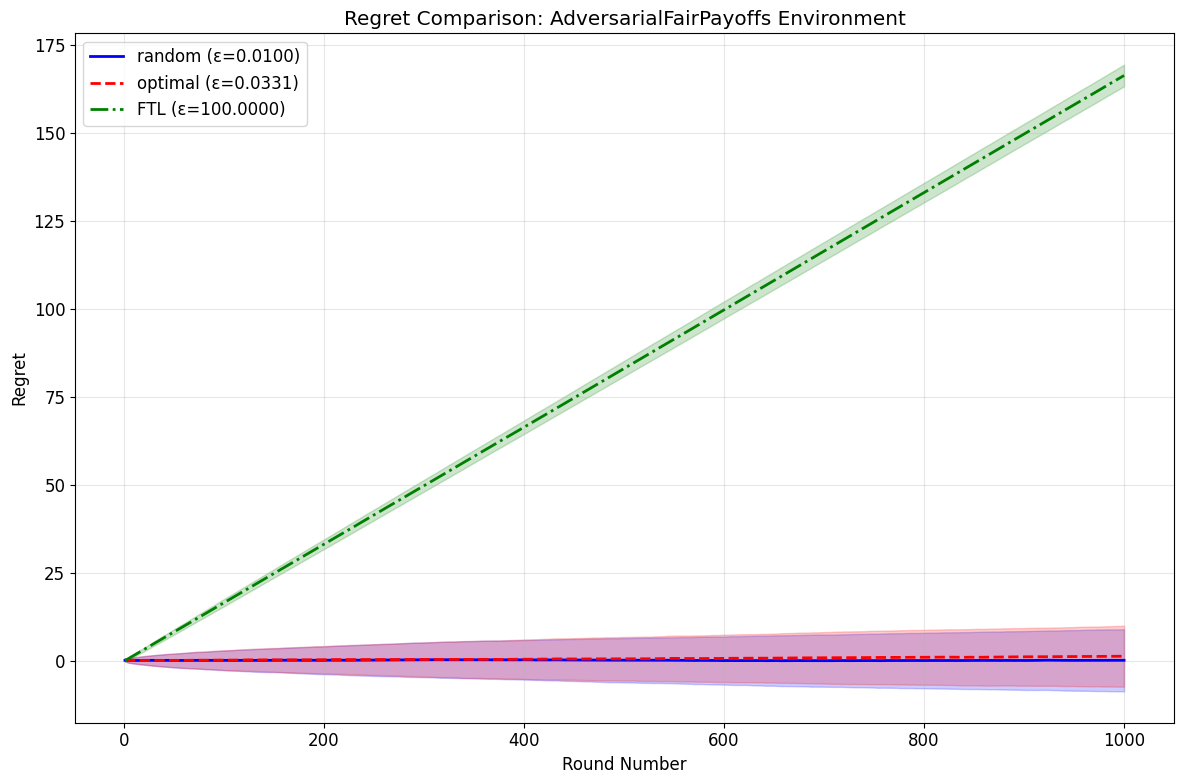

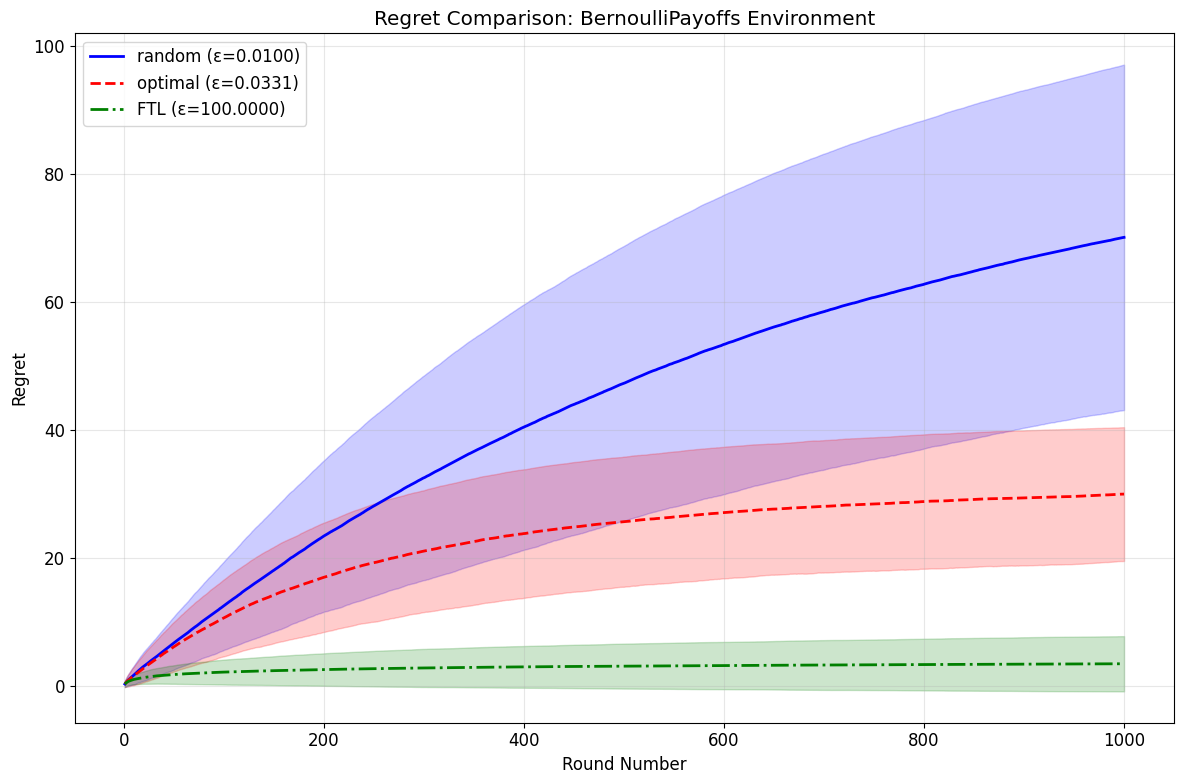

In [15]:
# Import visualization functions and run plots
import visualization

# Load the data
adversarial_df = pd.read_csv(adversarial_csv_path)
bernoulli_df = pd.read_csv(bernoulli_csv_path)

# Use the plot_regret_comparison function from visualization.py
visualization.plot_regret_comparison(adversarial_df, 'AdversarialFairPayoffs Environment', 'adversarial_regret_comparison.png')
visualization.plot_regret_comparison(bernoulli_df, 'BernoulliPayoffs Environment', 'bernoulli_regret_comparison.png')


# Detailed analysis
detailed analysis on B about action choice and local optima.

In [16]:
# BernoulliPayoffs(Analyze action selection patterns for each epsilon value)

action_analysis_data = []

for epsilon_name, epsilon_value in epsilon_values.items():
    print(f"\nAnalyzing action patterns for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    for sim in range(num_simulations):
        # Create environment and algorithm
        env = BernoulliPayoffs(k)
        algorithm = ExponentialWeights(k, epsilon=epsilon_value, n=n)
        
        # Get probabilities for this simulation
        probabilities = env.probabilities.copy()
        prob_order = np.argsort(probabilities)[::-1]  # Sort in descending order
        
        # Run algorithm
        regret_history, total_payoff, action_history, cumulative_payoffs = algorithm.run_algorithm(env.generate_payoffs)
        
        # Count action selections
        action_counts = np.bincount(action_history, minlength=k)
        
        # Calculate action selection rates
        action_rates = action_counts / n
        
        # Store analysis data
        action_analysis_data.append({
            'simulation': sim + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'probabilities': probabilities.tolist(),
            'prob_order': prob_order.tolist(),  # Index of actions sorted by probability (highest first)
            'action_counts': action_counts.tolist(),
            'action_rates': action_rates.tolist(),
            'total_payoff': total_payoff,
            'final_regret': regret_history[-1]
        })
        
        if (sim + 1) % 200 == 0:
            print(f"  Completed {sim + 1}/{num_simulations} simulations")

print("\nAction analysis completed!")

# Convert to DataFrame
action_df = pd.DataFrame(action_analysis_data)

# Save detailed results
action_csv_path = data_dir / 'bernoulli_action_analysis.csv'
action_df.to_csv(action_csv_path, index=False)
print(f"Action analysis saved to {action_csv_path}")

# Display summary statistics
print("\nAction Selection Summary:")
for epsilon_type in epsilon_values.keys():
    subset = action_df[action_df['epsilon_type'] == epsilon_type]
    
    print(f"\n{epsilon_type} (ε={subset['epsilon_value'].iloc[0]:.6f}):")
    
    # Average action selection rates
    avg_rates = np.mean([rates for rates in subset['action_rates']], axis=0)
    print(f"  Average action selection rates: {avg_rates}")
    
    # Most frequently selected action
    most_selected = np.argmax(avg_rates)
    print(f"  Most frequently selected action: {most_selected} (rate: {avg_rates[most_selected]:.3f})")
    
    # Probability vs selection correlation
    avg_probs = np.mean([probs for probs in subset['probabilities']], axis=0)
    prob_order = np.argsort(avg_probs)[::-1]
    print(f"  Probability order (highest first): {prob_order}")
    print(f"  Selection rate order (highest first): {np.argsort(avg_rates)[::-1]}")
    
    # Correlation between probability and selection rate
    correlation = np.corrcoef(avg_probs, avg_rates)[0, 1]
    print(f"  Probability-Selection correlation: {correlation:.3f}")



Analyzing action patterns for random (epsilon = 0.010000)...
Bernoulli probabilities for each action: [0.00091183 0.17572284 0.46114369]
Bernoulli probabilities for each action: [0.42024019 0.45160862 0.37858525]
Bernoulli probabilities for each action: [0.45091554 0.32134972 0.33589954]
Bernoulli probabilities for each action: [0.47622587 0.09315529 0.31592718]
Bernoulli probabilities for each action: [0.15554897 0.43547044 0.35201744]
Bernoulli probabilities for each action: [0.14508964 0.05931269 0.08237707]
Bernoulli probabilities for each action: [0.34324304 0.26204806 0.14529785]
Bernoulli probabilities for each action: [0.38044766 0.44825664 0.29913511]
Bernoulli probabilities for each action: [0.16967041 0.38845854 0.33470701]
Bernoulli probabilities for each action: [0.0776947  0.16695393 0.48276695]
Bernoulli probabilities for each action: [0.2667892  0.32099857 0.15419085]
Bernoulli probabilities for each action: [0.44792178 0.11430251 0.26068656]
Bernoulli probabilities fo


Rank analysis saved to /Users/harashimakoshi/CS332/332Project2/figures/bernoulli_rank_analysis.png


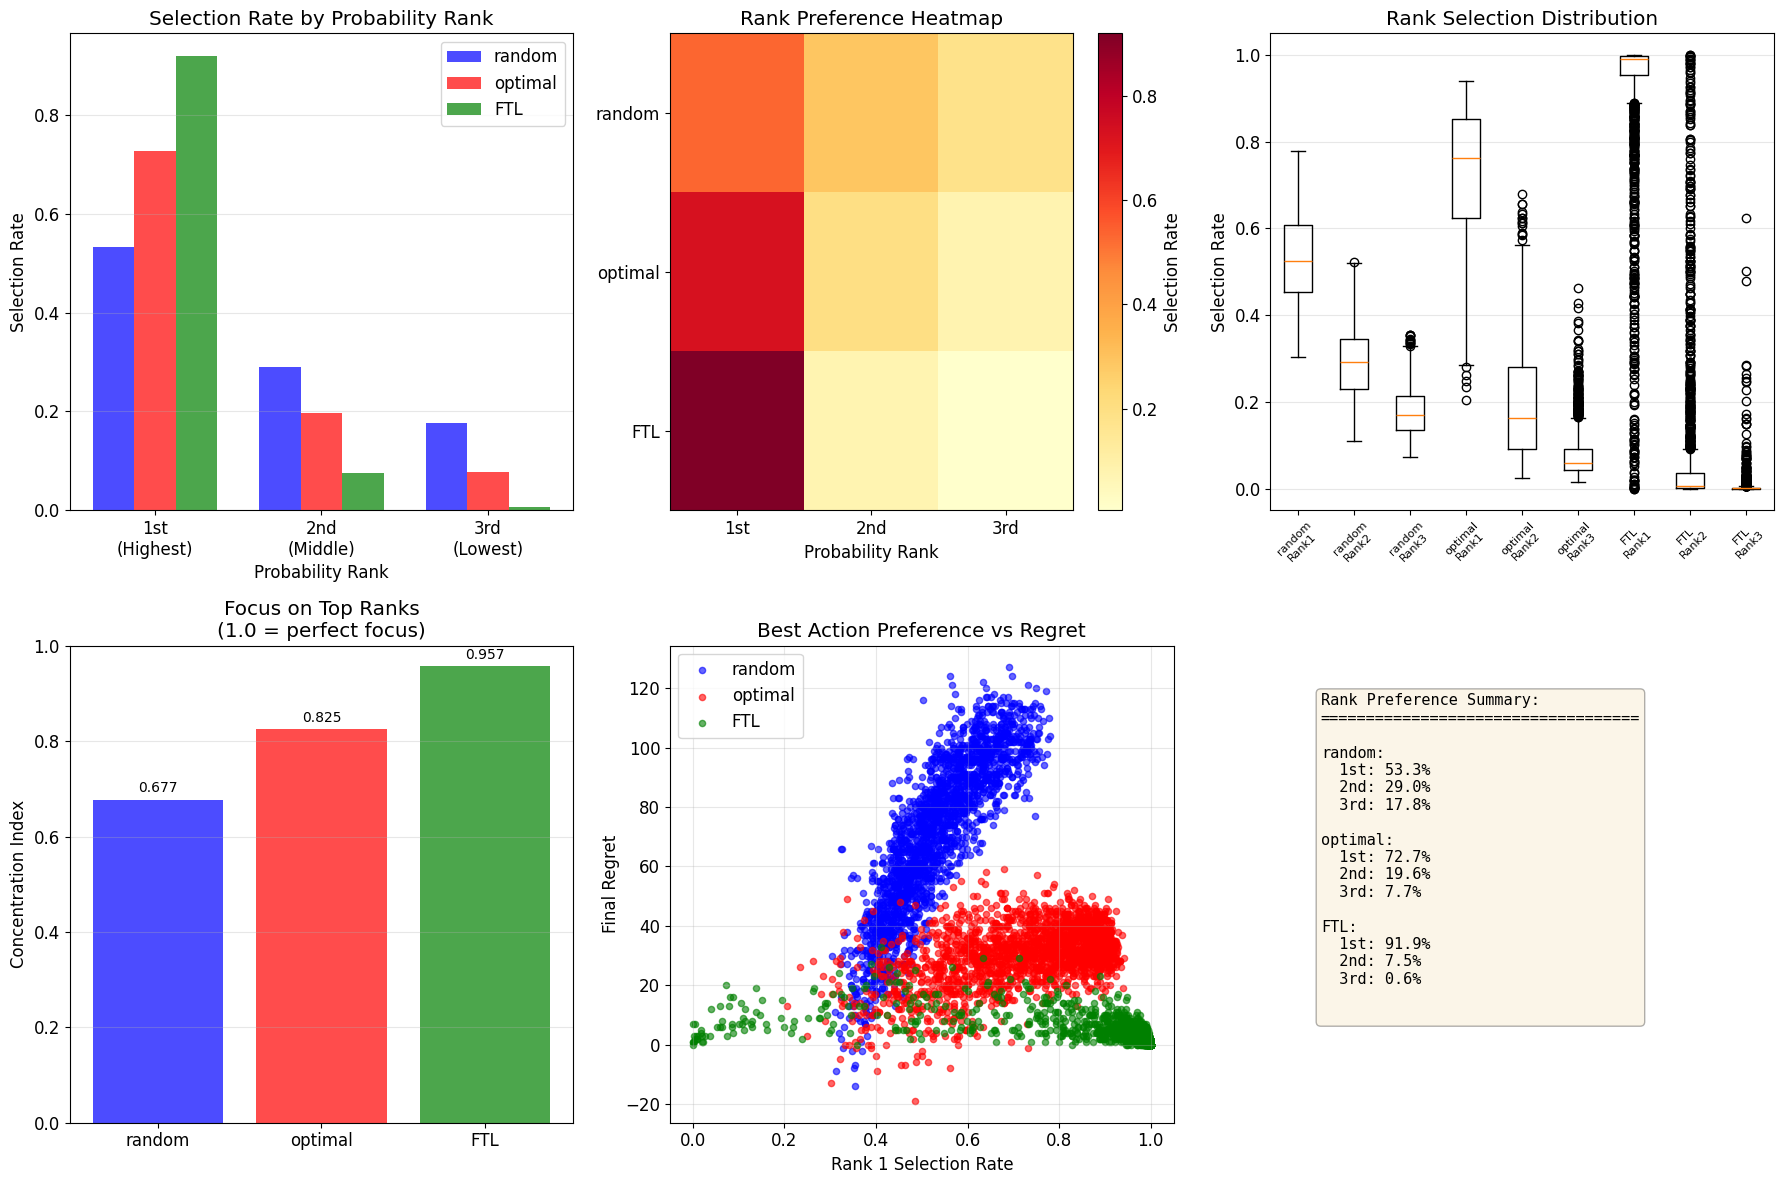

Rank data saved to /Users/harashimakoshi/CS332/332Project2/data/bernoulli_rank_analysis.csv


In [18]:
# Rank-based Analysis: Which probability ranks does each epsilon strategy prefer?

# Create rank-based analysis
rank_analysis_data = []

for epsilon_type in epsilon_values.keys():
    subset = action_df[action_df['epsilon_type'] == epsilon_type]
    
    # For each simulation, calculate selection rates by probability rank
    for _, row in subset.iterrows():
        probabilities = np.array(row['probabilities'])
        action_rates = np.array(row['action_rates'])
        
        # Get probability ranking (1st = highest probability, 3rd = lowest)
        prob_ranks = np.argsort(probabilities)[::-1]  # Descending order
        
        # Calculate selection rates by rank
        rank_selection_rates = []
        for rank in range(k):
            action_idx = prob_ranks[rank]  # Action with rank-th highest probability
            selection_rate = action_rates[action_idx]
            rank_selection_rates.append(selection_rate)
        
        rank_analysis_data.append({
            'epsilon_type': epsilon_type,
            'epsilon_value': row['epsilon_value'],
            'simulation': row['simulation'],
            'rank_1_selection_rate': rank_selection_rates[0],  # Highest probability action
            'rank_2_selection_rate': rank_selection_rates[1],  # Second highest
            'rank_3_selection_rate': rank_selection_rates[2],  # Lowest probability
            'final_regret': row['final_regret']
        })

rank_df = pd.DataFrame(rank_analysis_data)

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
colors = {'random': 'blue', 'optimal': 'red', 'FTL': 'green'}

# Plot 1: Selection rates by probability rank
ax1 = axes[0, 0]
rank_labels = ['1st\n(Highest)', '2nd\n(Middle)', '3rd\n(Lowest)']
x_pos = np.arange(3)
width = 0.25

for i, epsilon_type in enumerate(epsilon_values.keys()):
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    avg_rates = [
        subset['rank_1_selection_rate'].mean(),
        subset['rank_2_selection_rate'].mean(),
        subset['rank_3_selection_rate'].mean()
    ]
    ax1.bar(x_pos + i * width, avg_rates, width, 
            label=epsilon_type, color=colors[epsilon_type], alpha=0.7)

ax1.set_xlabel('Probability Rank')
ax1.set_ylabel('Selection Rate')
ax1.set_title('Selection Rate by Probability Rank')
ax1.set_xticks(x_pos + width)
ax1.set_xticklabels(rank_labels)
ax1.legend()
ax1.grid(True, alpha=0.3, axis='y')

# Plot 2: Heatmap
ax2 = axes[0, 1]
heatmap_data = []
for epsilon_type in epsilon_values.keys():
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    avg_rates = [
        subset['rank_1_selection_rate'].mean(),
        subset['rank_2_selection_rate'].mean(),
        subset['rank_3_selection_rate'].mean()
    ]
    heatmap_data.append(avg_rates)

im = ax2.imshow(np.array(heatmap_data), cmap='YlOrRd', aspect='auto')
ax2.set_xticks(range(3))
ax2.set_xticklabels(['1st', '2nd', '3rd'])
ax2.set_yticks(range(3))
ax2.set_yticklabels(list(epsilon_values.keys()))
ax2.set_title('Rank Preference Heatmap')
ax2.set_xlabel('Probability Rank')
plt.colorbar(im, ax=ax2, label='Selection Rate')

# Plot 3: Distribution
ax3 = axes[0, 2]
box_data = []
box_labels = []
for epsilon_type in epsilon_values.keys():
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    for rank in range(3):
        box_data.append(subset[f'rank_{rank+1}_selection_rate'].values)
        box_labels.append(f'{epsilon_type}\nRank{rank+1}')

ax3.boxplot(box_data, tick_labels=box_labels)
ax3.set_ylabel('Selection Rate')
ax3.set_title('Rank Selection Distribution')
ax3.tick_params(axis='x', rotation=45, labelsize=8)
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Concentration index
ax4 = axes[1, 0]
concentration_data = []
for epsilon_type in epsilon_values.keys():
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    r1 = subset['rank_1_selection_rate'].mean()
    r2 = subset['rank_2_selection_rate'].mean()
    r3 = subset['rank_3_selection_rate'].mean()
    concentration = (r1 + 0.5 * r2) / (r1 + r2 + r3)
    concentration_data.append(concentration)

bars = ax4.bar(epsilon_values.keys(), concentration_data, 
               color=[colors[et] for et in epsilon_values.keys()], alpha=0.7)
ax4.set_ylabel('Concentration Index')
ax4.set_title('Focus on Top Ranks\n(1.0 = perfect focus)')
ax4.set_ylim(0, 1)
ax4.grid(True, alpha=0.3, axis='y')

for bar, value in zip(bars, concentration_data):
    ax4.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{value:.3f}', ha='center', va='bottom', fontsize=10)

# Plot 5: Rank vs Regret
ax5 = axes[1, 1]
for epsilon_type in epsilon_values.keys():
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    ax5.scatter(subset['rank_1_selection_rate'], subset['final_regret'], 
                color=colors[epsilon_type], label=epsilon_type, alpha=0.6, s=20)

ax5.set_xlabel('Rank 1 Selection Rate')
ax5.set_ylabel('Final Regret')
ax5.set_title('Best Action Preference vs Regret')
ax5.legend()
ax5.grid(True, alpha=0.3)

# Plot 6: Summary stats
ax6 = axes[1, 2]
ax6.axis('off')
summary_text = "Rank Preference Summary:\n" + "="*35 + "\n\n"

for epsilon_type in epsilon_values.keys():
    subset = rank_df[rank_df['epsilon_type'] == epsilon_type]
    r1 = subset['rank_1_selection_rate'].mean()
    r2 = subset['rank_2_selection_rate'].mean()
    r3 = subset['rank_3_selection_rate'].mean()
    total = r1 + r2 + r3
    
    summary_text += f"{epsilon_type}:\n"
    summary_text += f"  1st: {r1/total*100:.1f}%\n"
    summary_text += f"  2nd: {r2/total*100:.1f}%\n"
    summary_text += f"  3rd: {r3/total*100:.1f}%\n\n"

ax6.text(0.1, 0.9, summary_text, transform=ax6.transAxes, 
         fontsize=11, verticalalignment='top', fontfamily='monospace',
         bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.3))

plt.tight_layout()
rank_plot_path = figures_dir / 'bernoulli_rank_analysis.png'
plt.savefig(rank_plot_path, dpi=300, bbox_inches='tight')
print(f"\nRank analysis saved to {rank_plot_path}")
plt.show()

# Save data
rank_csv_path = data_dir / 'bernoulli_rank_analysis.csv'
rank_df.to_csv(rank_csv_path, index=False)
print(f"Rank data saved to {rank_csv_path}")


# C

In [5]:
# C. エスパス5店舗データ - EWアルゴリズム

# エスパス5店舗でのEWアルゴリズム実行
print("エスパス5店舗でのEWアルゴリズム実行...")

# エスパス用のパラメータ
k_espace = 5  # 5店舗
n_espace = 2317  # データ日数に合わせる

# エスパス用のepsilon値
epsilon_values_espace = {
    'random': 0.01,
    'optimal': np.sqrt(np.log(k_espace) / n_espace),  # n_espaceを使用
    'FTL': 100
}

print(f"エスパス用Epsilon値 (k={k_espace}):")
for name, value in epsilon_values_espace.items():
    print(f"  {name}: {value:.6f}")

# エスパス結果保存用
espace_results = []

for epsilon_name, epsilon_value in epsilon_values_espace.items():
    print(f"\nエスパス {epsilon_name} (epsilon = {epsilon_value:.6f}) 実行中...")
    
    # 各シミュレーションの結果を保存
    regret_histories = []
    total_payoffs = []
    
    for sim in range(num_simulations):
        env = EspacePayoffs(k_espace)
        algorithm = ExponentialWeights(k_espace, epsilon=epsilon_value, n=n_espace)  # epsilon_valueを修正
        
        # Run algorithm
        regret_history, total_payoff, action_history, cumulative_payoffs = algorithm.run_algorithm(env.generate_payoffs)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        
        if (sim + 1) % 20 == 0:
            print(f"  完了: {sim + 1}/{num_simulations} シミュレーション")
    
    # 結果を保存
    for i, (regret_history, total_payoff) in enumerate(zip(regret_histories, total_payoffs)):
        espace_results.append({
            'epsilon': epsilon_name,
            'epsilon_value': epsilon_value,
            'simulation': i,
            'round': list(range(1, n_espace + 1)),  # n_espaceを使用
            'cumulative_regret': regret_history,
            'cumulative_payoff': total_payoff
        })
    
    print(f"  完了: {len(regret_histories)} シミュレーション")

print(f"\nエスパス結果数: {len(espace_results)}")

エスパス5店舗でのEWアルゴリズム実行...
エスパス用Epsilon値 (k=5):
  random: 0.010000
  optimal: 0.026356
  FTL: 100.000000

エスパス random (epsilon = 0.010000) 実行中...
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新館: 24.97
  エスパス渋谷本館: 41.60
  エスパス新宿歌舞伎町店: 69.88
  エスパス上野本館: 22.53
  エスパス秋葉原駅前店 : 88.78
  エスパス渋谷駅前新

/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_3601/1025763526.py:30: UserWarning: Glyph 12456 (\N{KATAKANA LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_3601/1025763526.py:30: UserWarning: Glyph 12473 (\N{KATAKANA LETTER SU}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_3601/1025763526.py:30: UserWarning: Glyph 12497 (\N{KATAKANA LETTER PA}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_3601/1025763526.py:30: UserWarning: Glyph 24215 (\N{CJK UNIFIED IDEOGRAPH-5E97}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/ipykernel_3601/1025763526.py:30: UserWarning: Glyph 33303 (\N{CJK UNIFIED IDEOGRAPH-8217}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/var/folders/my/j3wjhgx94rscj7c09g72009c0000gn/T/i

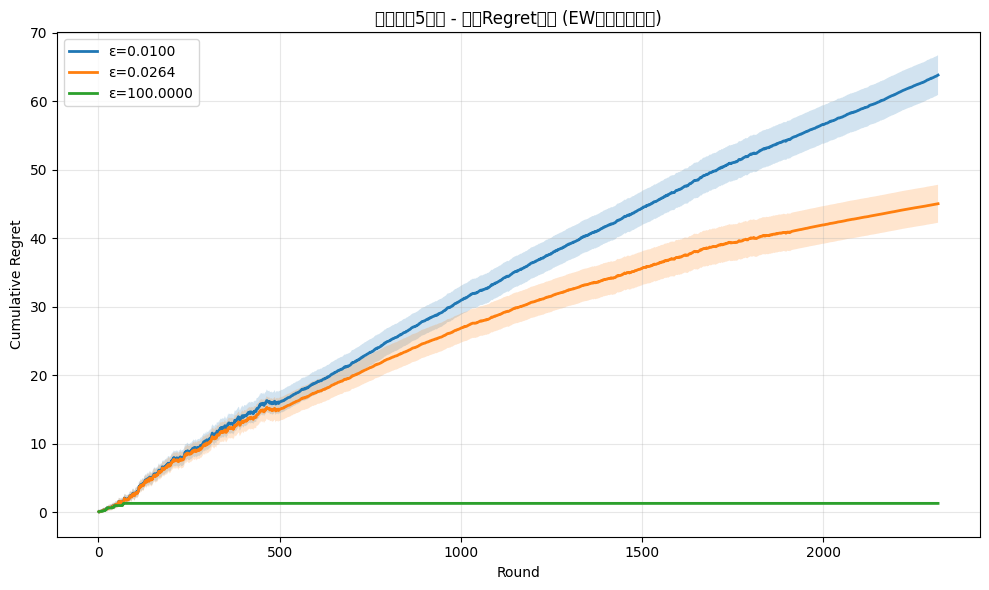

In [6]:
# エスパス結果の可視化（Regretのみ）
fig, ax = plt.subplots(1, 1, figsize=(10, 6))

# 累積regretの比較
for epsilon_name in epsilon_values_espace.keys():
    # 各epsilonの結果を取得
    epsilon_results = [r for r in espace_results if r['epsilon'] == epsilon_name]
    
    # 全シミュレーションの累積regretを取得
    all_regrets = [r['cumulative_regret'] for r in epsilon_results]
    
    # 平均と標準偏差を計算
    mean_regret = np.mean(all_regrets, axis=0)
    std_regret = np.std(all_regrets, axis=0)
    
    # プロット（n_espaceを使用）
    rounds = list(range(1, n_espace + 1))
    ax.plot(rounds, mean_regret, label=f'ε={epsilon_values_espace[epsilon_name]:.4f}', linewidth=2)
    ax.fill_between(rounds, 
                    mean_regret - std_regret, 
                    mean_regret + std_regret, 
                    alpha=0.2)

ax.set_xlabel('Round')
ax.set_ylabel('Cumulative Regret')
ax.set_title('エスパス5店舗 - 累積Regret比較 (EWアルゴリズム)')
ax.legend()
ax.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig(figures_dir / 'espace_ew_regret.png', dpi=300, bbox_inches='tight')
plt.show()

# D

In [11]:
# Epsilon values for ResearchPayoffs (k=2)
epsilon_values_research = {
    'random': 0.01,  
    'optimal': np.sqrt(np.log(k_research) / n), 
    'FTL': 100  
}

print(f"\nEpsilon values for Research (k={k_research}):")
for name, value in epsilon_values_research.items():
    print(f"  {name}: {value:.6f}")


Epsilon values for Research (k=2):
  random: 0.010000
  optimal: 0.026328
  FTL: 100.000000


In [13]:
# ResearchPayoffs environment

# Save results
research_results_data = []

for epsilon_name, epsilon_value in epsilon_values_research.items():
    print(f"\nRunning ResearchPayoffs simulations for {epsilon_name} (epsilon = {epsilon_value:.6f})...")
    
    regret_histories = []
    total_payoffs = []
    knowledge_histories = []
    progress_histories = []
    
    for sim in range(num_simulations):
        env = ResearchPayoffs(k_research, n)
        algorithm = ExponentialWeights(k_research, epsilon=epsilon_value, n=n)
        
        # Run algorithm using EW.py implementation
        regret_history, total_payoff, action_history, cumulative_payoffs = algorithm.run_algorithm(env.generate_payoffs)
        
        # Update cumulative stats based on action history
        for round_num, action in enumerate(action_history):
            env.update_cumulative_stats(action, round_num)
        
        regret_histories.append(regret_history)
        total_payoffs.append(total_payoff)
        
        # Get cumulative knowledge and progress
        stats = env.get_cumulative_stats()
        knowledge_histories.append(stats['cumulative_knowledge'])
        progress_histories.append(stats['cumulative_progress'])
        
        if (sim + 1) % 20 == 0:
            print(f"  Completed {sim + 1}/{num_simulations} simulations")
    
    # Add results to dataframe
    regret_array = np.array(regret_histories)
    mean_regret = np.mean(regret_array, axis=0)
    std_regret = np.std(regret_array, axis=0)
    final_regrets = regret_array[:, -1]
    
    # Knowledge and progress statistics
    mean_knowledge = np.mean(knowledge_histories)
    std_knowledge = np.std(knowledge_histories)
    mean_progress = np.mean(progress_histories)
    std_progress = np.std(progress_histories)
    
    for round_num in range(n):
        research_results_data.append({
            'round': round_num + 1,
            'epsilon_type': epsilon_name,
            'epsilon_value': epsilon_value,
            'mean_regret': mean_regret[round_num],
            'std_regret': std_regret[round_num],
            'final_regret_mean': np.mean(final_regrets),
            'final_regret_std': np.std(final_regrets),
            'mean_knowledge': mean_knowledge,
            'std_knowledge': std_knowledge,
            'mean_progress': mean_progress,
            'std_progress': std_progress
        })

print("\nAll ResearchPayoffs simulations completed!")

research_results_df = pd.DataFrame(research_results_data)

# Save results to csv file
research_csv_path = data_dir / 'research_payoffs_results.csv'
research_results_df.to_csv(research_csv_path, index=False)
print(f"Research results saved to {research_csv_path}")

# Statistical results
print("\nResearchPayoffs Final regret statistics:")
for epsilon_name in epsilon_values_research.keys():
    subset = research_results_df[research_results_df['epsilon_type'] == epsilon_name]
    final_stats = subset.iloc[0]  
    print(f"  {epsilon_name}: Mean = {final_stats['final_regret_mean']:.4f}, Std = {final_stats['final_regret_std']:.4f}")

print("\nResearchPayoffs Knowledge and Progress statistics:")
for epsilon_name in epsilon_values_research.keys():
    subset = research_results_df[research_results_df['epsilon_type'] == epsilon_name]
    stats = subset.iloc[0]
    print(f"  {epsilon_name}:")
    print(f"    Knowledge: Mean = {stats['mean_knowledge']:.4f}, Std = {stats['std_knowledge']:.4f}")
    print(f"    Progress: Mean = {stats['mean_progress']:.4f}, Std = {stats['std_progress']:.4f}")



Running ResearchPayoffs simulations for random (epsilon = 0.010000)...


AssertionError: 

ResearchPayoffs plots saved to /Users/harashimakoshi/CS332/332Project2/figures/research_payoffs_analysis.png


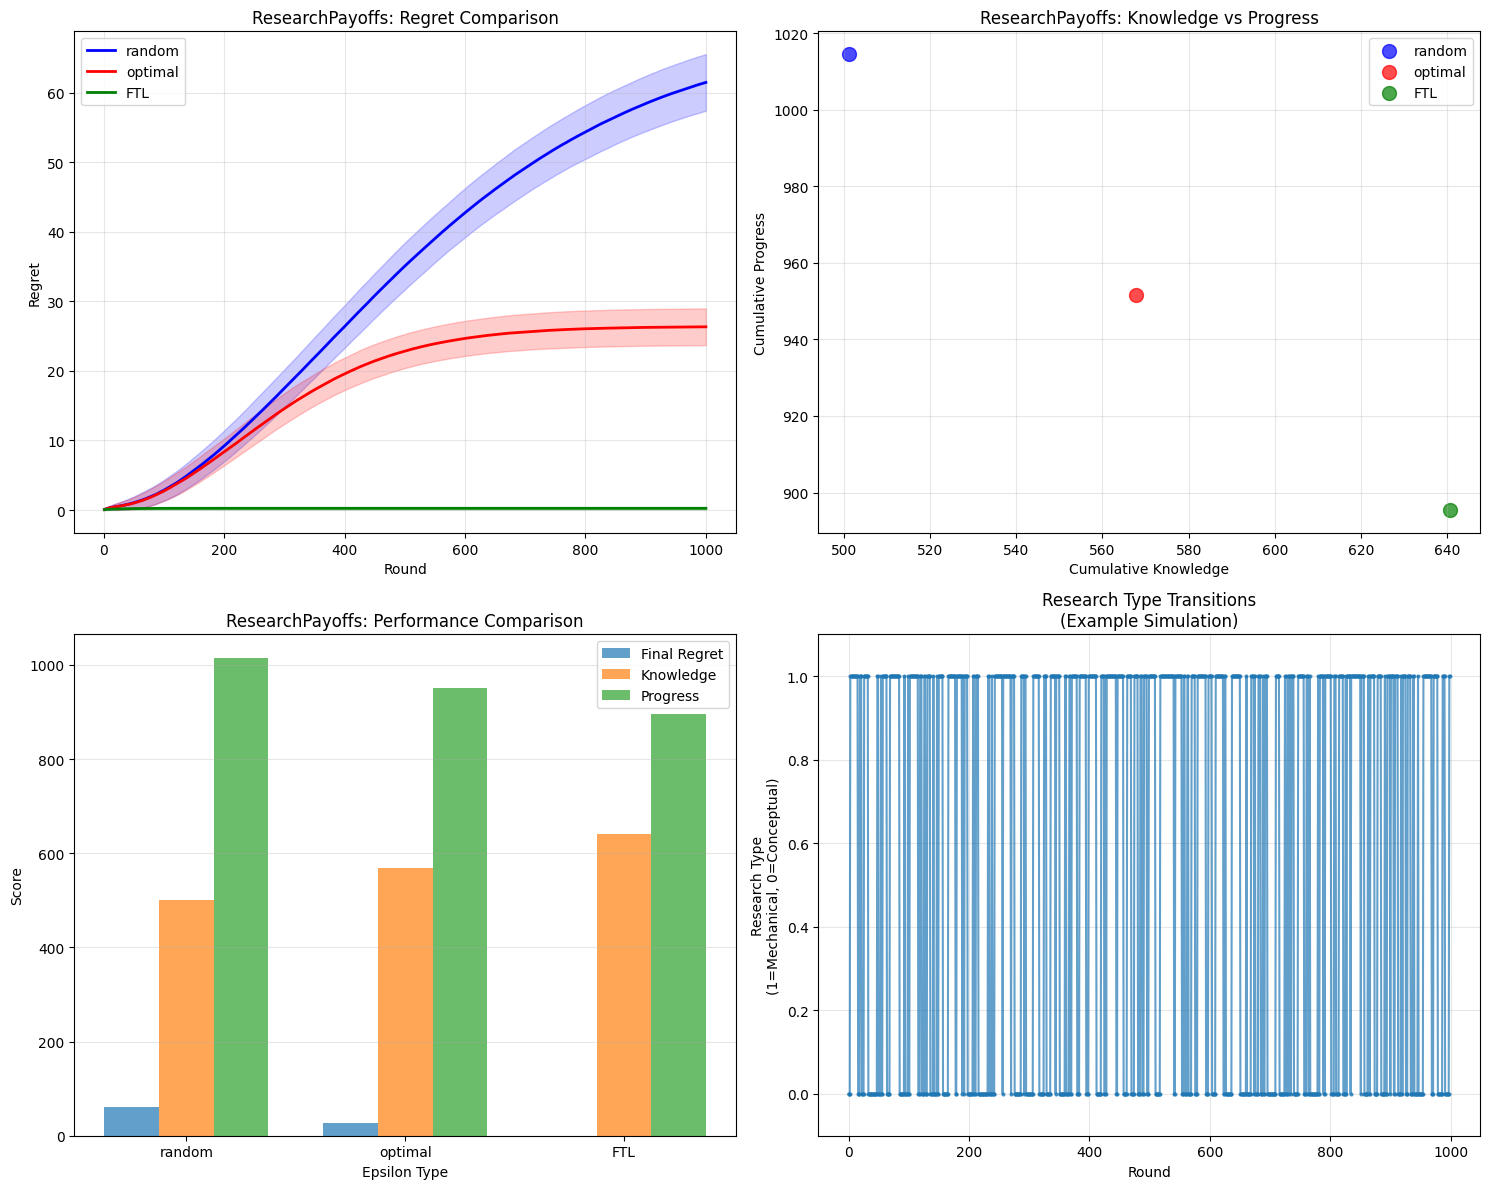


ResearchPayoffs Summary:

random:
  Final Regret: 61.4568 ± 4.0649
  Knowledge: 501.1066 ± 91.6021
  Progress: 1014.5472 ± 353.9817
  Total Score: 1515.6538

optimal:
  Final Regret: 26.3290 ± 2.6419
  Knowledge: 567.7410 ± 116.4280
  Progress: 951.7034 ± 328.6065
  Total Score: 1519.4444

FTL:
  Final Regret: 0.2429 ± 0.1843
  Knowledge: 640.6092 ± 146.3346
  Progress: 895.4302 ± 300.1063
  Total Score: 1536.0395


In [12]:
# ResearchPayoffs Visualization

# Create comprehensive plots for ResearchPayoffs
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Regret comparison
ax1 = axes[0, 0]
colors = {'random': 'blue', 'optimal': 'red', 'FTL': 'green'}

for epsilon_name in epsilon_values_research.keys():
    subset = research_results_df[research_results_df['epsilon_type'] == epsilon_name]
    rounds = subset['round'].values
    mean_regret = subset['mean_regret'].values
    std_regret = subset['std_regret'].values
    
    ax1.plot(rounds, mean_regret, color=colors[epsilon_name], label=f'{epsilon_name}', linewidth=2)
    ax1.fill_between(rounds, mean_regret - std_regret, mean_regret + std_regret, 
                     color=colors[epsilon_name], alpha=0.2)

ax1.set_xlabel('Round')
ax1.set_ylabel('Regret')
ax1.set_title('ResearchPayoffs: Regret Comparison')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Plot 2: Knowledge vs Progress scatter
ax2 = axes[0, 1]
for epsilon_name in epsilon_values_research.keys():
    subset = research_results_df[research_results_df['epsilon_type'] == epsilon_name]
    knowledge = subset['mean_knowledge'].iloc[0]  # Same for all rounds
    progress = subset['mean_progress'].iloc[0]    # Same for all rounds
    ax2.scatter(knowledge, progress, color=colors[epsilon_name], 
                label=f'{epsilon_name}', s=100, alpha=0.7)

ax2.set_xlabel('Cumulative Knowledge')
ax2.set_ylabel('Cumulative Progress')
ax2.set_title('ResearchPayoffs: Knowledge vs Progress')
ax2.legend()
ax2.grid(True, alpha=0.3)

# Plot 3: Epsilon comparison (bar chart)
ax3 = axes[1, 0]
epsilon_names = list(epsilon_values_research.keys())
final_regrets = []
knowledge_scores = []
progress_scores = []

for epsilon_name in epsilon_names:
    subset = research_results_df[research_results_df['epsilon_type'] == epsilon_name]
    final_regrets.append(subset['final_regret_mean'].iloc[0])
    knowledge_scores.append(subset['mean_knowledge'].iloc[0])
    progress_scores.append(subset['mean_progress'].iloc[0])

x = np.arange(len(epsilon_names))
width = 0.25

bars1 = ax3.bar(x - width, final_regrets, width, label='Final Regret', alpha=0.7)
bars2 = ax3.bar(x, knowledge_scores, width, label='Knowledge', alpha=0.7)
bars3 = ax3.bar(x + width, progress_scores, width, label='Progress', alpha=0.7)

ax3.set_xlabel('Epsilon Type')
ax3.set_ylabel('Score')
ax3.set_title('ResearchPayoffs: Performance Comparison')
ax3.set_xticks(x)
ax3.set_xticklabels(epsilon_names)
ax3.legend()
ax3.grid(True, alpha=0.3, axis='y')

# Plot 4: Research type transition over time (simulation example)
ax4 = axes[1, 1]
# Run a single simulation to show research type transitions
env = ResearchPayoffs(k_research, n)
research_types = []
for round_num in range(n):
    research_type = env._determine_research_type()
    research_types.append(1 if research_type == 'mechanical' else 0)

ax4.plot(range(n), research_types, 'o-', markersize=2, alpha=0.7)
ax4.set_xlabel('Round')
ax4.set_ylabel('Research Type\n(1=Mechanical, 0=Conceptual)')
ax4.set_title('Research Type Transitions\n(Example Simulation)')
ax4.set_ylim(-0.1, 1.1)
ax4.grid(True, alpha=0.3)

plt.tight_layout()
research_plot_path = figures_dir / 'research_payoffs_analysis.png'
plt.savefig(research_plot_path, dpi=300, bbox_inches='tight')
print(f"ResearchPayoffs plots saved to {research_plot_path}")
plt.show()

# Summary statistics
print("\nResearchPayoffs Summary:")
print("=" * 50)
for epsilon_name in epsilon_values_research.keys():
    subset = research_results_df[research_results_df['epsilon_type'] == epsilon_name]
    stats = subset.iloc[0]
    print(f"\n{epsilon_name}:")
    print(f"  Final Regret: {stats['final_regret_mean']:.4f} ± {stats['final_regret_std']:.4f}")
    print(f"  Knowledge: {stats['mean_knowledge']:.4f} ± {stats['std_knowledge']:.4f}")
    print(f"  Progress: {stats['mean_progress']:.4f} ± {stats['std_progress']:.4f}")
    print(f"  Total Score: {stats['mean_knowledge'] + stats['mean_progress']:.4f}")
